Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

Reading the dataset

In [2]:
data=pd.read_csv("haberman.csv")

initital five data points of the dataset

In [3]:
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


bottom five data points of the dataset

In [4]:
data.tail()

,30,64,1,1.1
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


statistical summary

In [5]:
data.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


No. of Points: 305

To find No. of classes we can select the fourth column or the "survival_status" columns since it will give us 2 classes of value 1 and value 2 

In [6]:
# renaming the columns

data=data.rename(columns={'30':'age','64':'op_year','1':'axill_nodes','1.1':'survival_status'})

In [7]:
data.shape

(305, 4)

In [8]:
# data points per class
data.survival_status.value_counts()

1    224
2     81
Name: survival_status, dtype: int64

since both the classes have unequal data points it is an imbalanced dataset

# Objective 
This notebook is made for exlorative data analysis of the haberman's cancer dataset. This dataset consists of four fields i.e.
1. Age
2. Operation Year
3. Axilliary Nymph Nodes
4. Survival Status

hence carrying out univariate and bivariate analysis will give us good estimate at how these fields are related and affected by other fields.
this can be used to classify or predict survival status of a patient.

# 1. Univariate Analysis
simplest analysis. only one variable taken at a time. 


a. Probability distribution function

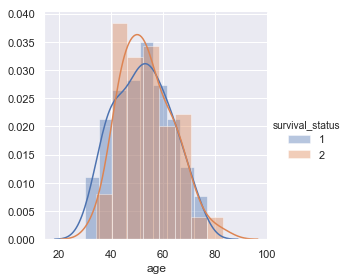

In [9]:
# pdf of survival status w.r.t age
sns.FacetGrid(data,hue='survival_status',height=4).map(sns.distplot,'age').add_legend()

C:\Users\Pranav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


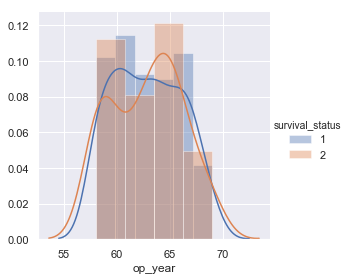

In [10]:
# pdf of survival status w.r.t. operation year
sns.FacetGrid(data,hue='survival_status',size=4).map(sns.distplot,'op_year').add_legend()

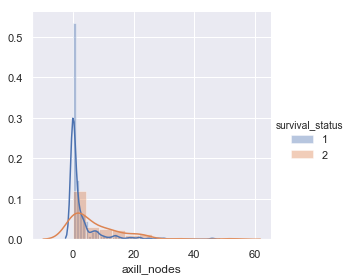

In [11]:
#pdf of survival status w.r.t axilliary lymph nodes
sns.FacetGrid(data,hue='survival_status',height=4).map(sns.distplot,'axill_nodes').add_legend()

# Observation
1. axilliary lymph nodes are a good feature for us and we can say that P.D.F. of survival status=1 is higher than survival status=2
2. Axilliary node<4 implies patient survived otherwise didnt survive.

b. cumulative distribution function

we willl only use axilliary lymph nodes, since its good enough to analyse the data

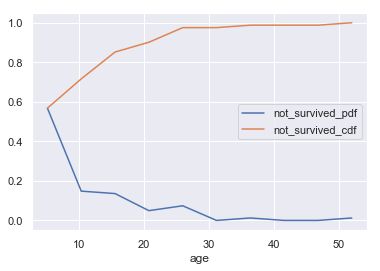

In [12]:
data_not_survived=data.loc[data['survival_status']==2]
counts,bin_edges=np.histogram(data_not_survived['axill_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('survival status')
plt.legend(['not_survived_pdf','not_survived_cdf'])
plt.xlabel('age')
plt.show()

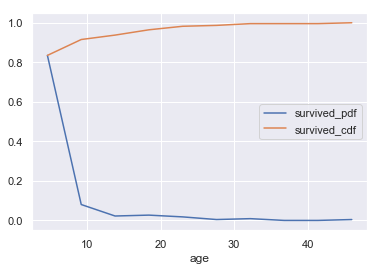

In [13]:
data_surv=data.loc[data['survival_status']==1]
counts,bin_edges=np.histogram(data_surv['axill_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('survival status')
plt.legend(['survived_pdf','survived_cdf'])
plt.xlabel('age')
plt.show()

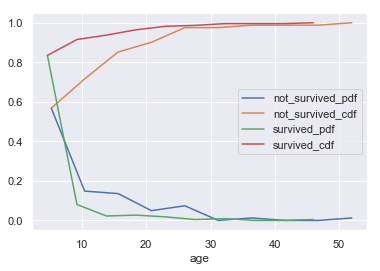

In [14]:
counts,bin_edges=np.histogram(data_not_survived['axill_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(data_surv['axill_nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('survival status')
plt.legend(['not_survived_pdf','not_survived_cdf','survived_pdf','survived_cdf'])
plt.xlabel('age')
plt.show()

# observations
1. Survival rate for patients with axilliary nodes>=4 is very high.
2. Axilliary node for survived and not survived patients in PDF is different, hence it is a very important feature 

c. Boxplot

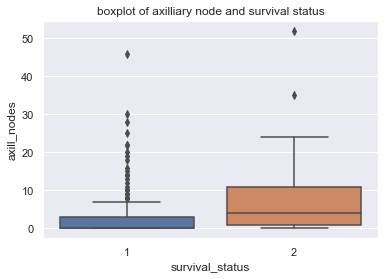

In [15]:
sns.boxplot(x='survival_status',y='axill_nodes',data=data).set_title('boxplot of axilliary node and survival status')
plt.show()

# observations
1. Boxplot 1 has 0.75 percentile at axilliary node=2 and 0.25 and 0.5 percentile overlap
2. Boxplot 2 has 0.25 percentile at axilliary node=1, 0.5 percentile at axilliary node=3 and 0.75 percentile at axilliary node=11

d. violin plot

graph which the histogram and boxplot represent

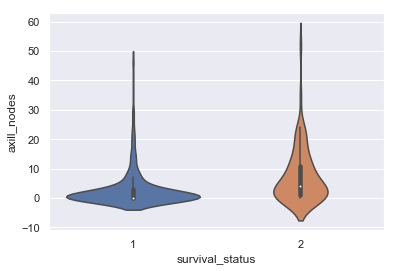

In [16]:
sns.violinplot(x='survival_status',y='axill_nodes',data=data,height=5)
plt.show()

# observations
1. 0.5 percentile of survival status =1 has 0 positive nodes, 0.75 percentile <3 positive axilliary nodes
2. 0.25 of survival rate =2 has 1 positive axilliary node, 0.5 has positive axilliary nodes<4 and 0.75 percentile has positive nodes<11

# Bivariate analysis

Scatter Plot

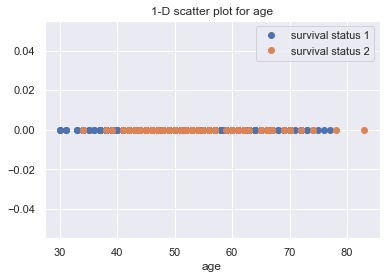

In [17]:
# 1-d scatter plot

sur=data.loc[data['survival_status']==1]
not_sur=data.loc[data['survival_status']==2]
plt.plot(sur['age'],np.zeros_like(sur['age']),'o',label='survival status 1')
plt.plot(not_sur['age'],np.zeros_like(not_sur['age']),'o',label='survival status 2')
plt.xlabel('age')
plt.title('1-D scatter plot for age')
plt.legend()
plt.show()

observation

patients between 40 and 70 have very high sruvaival rate of 2


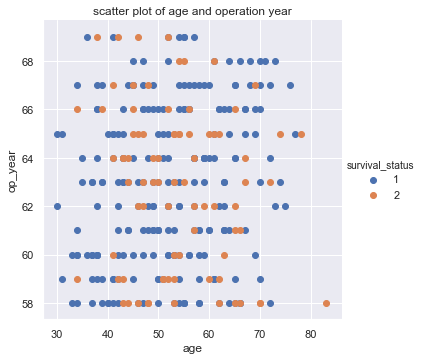

In [18]:
#2d scatter plot

# age and operation year
sns.FacetGrid(data,hue='survival_status',height=5).map(plt.scatter,'age','op_year').add_legend()
plt.title('scatter plot of age and operation year')
plt.show()

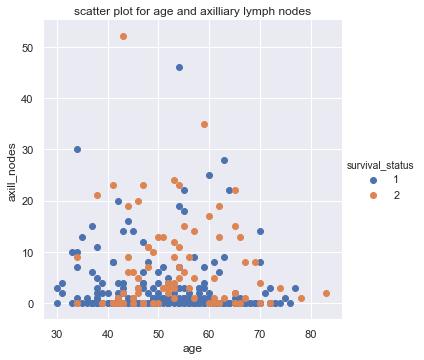

In [19]:
#age and axilliary lymph node

sns.FacetGrid(data,hue='survival_status',height=5).map(plt.scatter,'age','axill_nodes').add_legend()
plt.title('scatter plot for age and axilliary lymph nodes')
plt.show()

observations

1. axilliary lymp node<4 has extremely high survival rate
2. the class (status = 2 or 1) is not separable by linear means


Pair plot

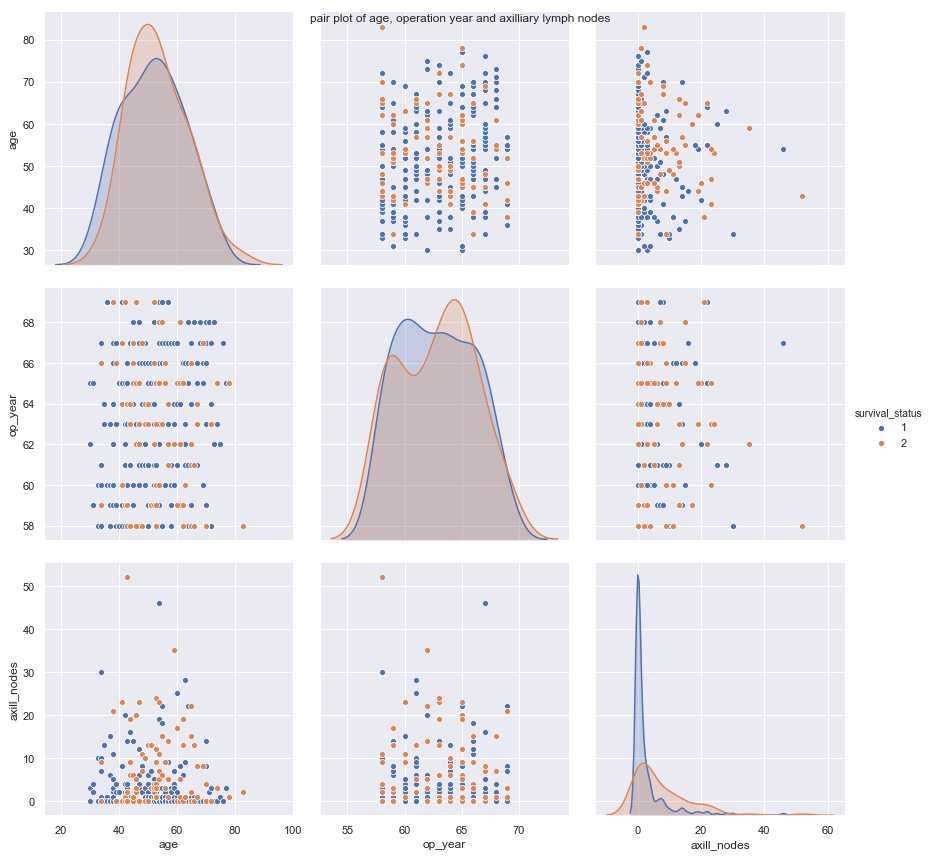

In [20]:
sns.pairplot(data,hue='survival_status',vars=['age','op_year','axill_nodes'],height=4)
plt.suptitle('pair plot of age, operation year and axilliary lymph nodes')
plt.show()

# observations
1. Overlapping does not help in deciding the most significant features. but w can say that ages 40 -70 had most patients with survival status =2
2. Pair plot in this dataset is not much informative

Conclusion from the analysis

1. Since both the classes(status=1 and 2) dont have equal data points, we have an imbalanced dataset.
2. The given classes are not seaparable via linear methods because of overlapping.
3. Axilliary lmph nodes is the most useful feature.